# Generate all Plots for the Thesis

In [597]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
mpl.style.use('seaborn')
plt.rcParams['axes.facecolor'] = '#f0f4f7'
plt.rc('legend', frameon=True,fancybox=True, framealpha=1)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
blue = '#4C72B0'
green = '#55A868'
red = '#C44E52'
purple = '#8172B2'
yellow = '#CCB974'
lightblue = '#64B5CD'

import importlib
import os
from os import path
import sys
import platform
import qgrid

import dill as pickl

from sync_class import SyncPhenosys
from eda_class import SpikesEDA
from behavior_class import BehaviorAnalysis
from sda_class import SpikesSDA
from report_class import SpikesReport

from analyze_phenosys import *

from thesis_plots import *

%load_ext autoreload
%autoreload 2


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


import warnings
warnings.filterwarnings('ignore')


window = 2000
iterations = 1000
bins = 50


# list -> [ session_name, [ttl_missing_rows], load_spikes, [spikes_trials_skip] ]
se_li = [('JG14_190621', [1900,1931,1996,2058,2127],True,[(0,6),(215,'end')]),
         ('JG14_190619', [111, 2781],False,[(0,1),(259,'end')]),
         ('JG14_190626', [1428, 1824, 1838, 2861, 2910, 3089, 3245, 3430, 3443],False,[(0,1),(276,'end')]),
         ('JG15_190722', [2094, 2574, 2637, 2808, 2831, 3499],False,[(271,'end')]),
         ('JG15_190725', [366,711,1487,1578,1659,2221,2666,2720,2769,2847,3371,3476],False,[(184,'end')]),
         ('JG18a_190814', [405,2621,2693,2770,2959,3015,3029,3038,3048],False,[(307,'end')]),
         ('JG18b_190828', [1744, 2363, 2648, 2701, 2731, 2778,2953,2967],True,[(0,0),(204,'end')]),
         ]



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [267]:
%time
all_sessions_dict = dict()
# load all sessions into dict
for session_name,missing_rows_ttl,load_spikes,spikes_trials_skip in se_li:
    all_sessions_dict[session_name]=load_session(session_name, missing_rows_ttl, load_spikes, spikes_trials_skip)


all_sessions_dict['JG15_190722'].sync.combined_df.loc[(131,32,428,6),"Delta (TTL-CSV)"]=30

JG14_190621 = all_sessions_dict['JG14_190621']
JG14_190621.sda.load_data_dict(window,iterations,bins)
JG14_190621.sda.load_info_df(sig_number=2)

JG18b_190828 = all_sessions_dict['JG18b_190828']
JG18b_190828.sda.load_data_dict(window,iterations,bins)
JG18b_190828.sda.load_info_df(sig_number=2)

SyntaxError: invalid syntax (<ipython-input-267-339bcf79d43c>, line 12)

# Chapter Methods

In [598]:
chapter = '05methods'

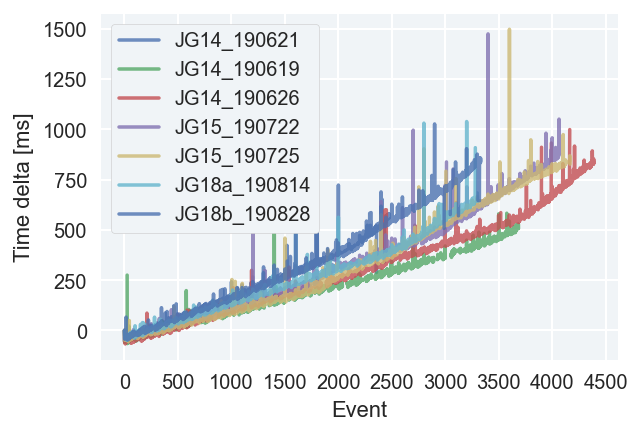

In [599]:
fig,ax = plt_trial_length(all_sessions_dict,figsize=set_size(0.8))
save_fig("drift", fig, chapter)

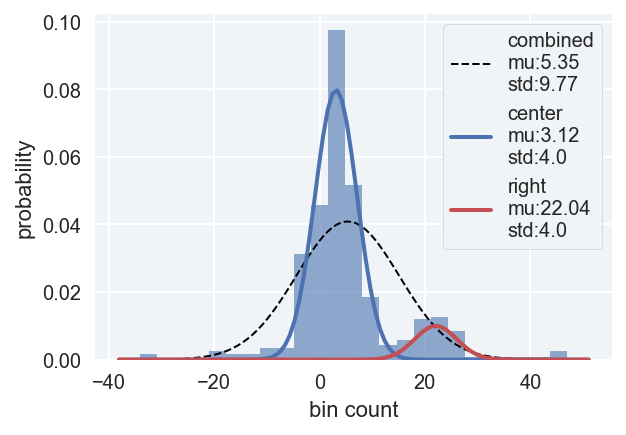

In [600]:
fig,ax = plt_fit_normdist(length_df["trial length cor"].dropna(), figsize=set_size(0.8))
save_fig("trial_dist", fig, chapter)

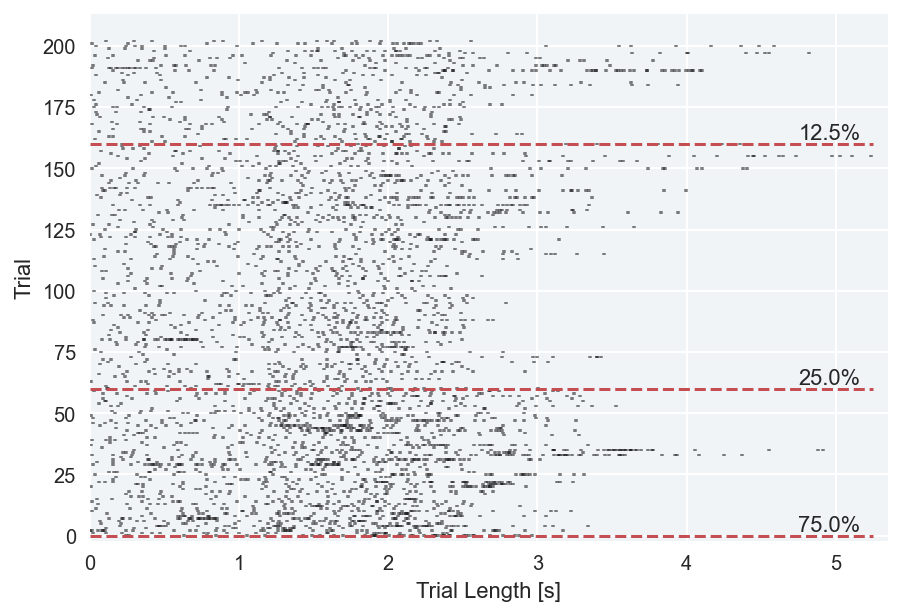

In [601]:
fig, ax = JG18b_190828.eda.plt_spike_train(33,figsize=set_size(1.1))
save_fig("psth", fig, chapter)

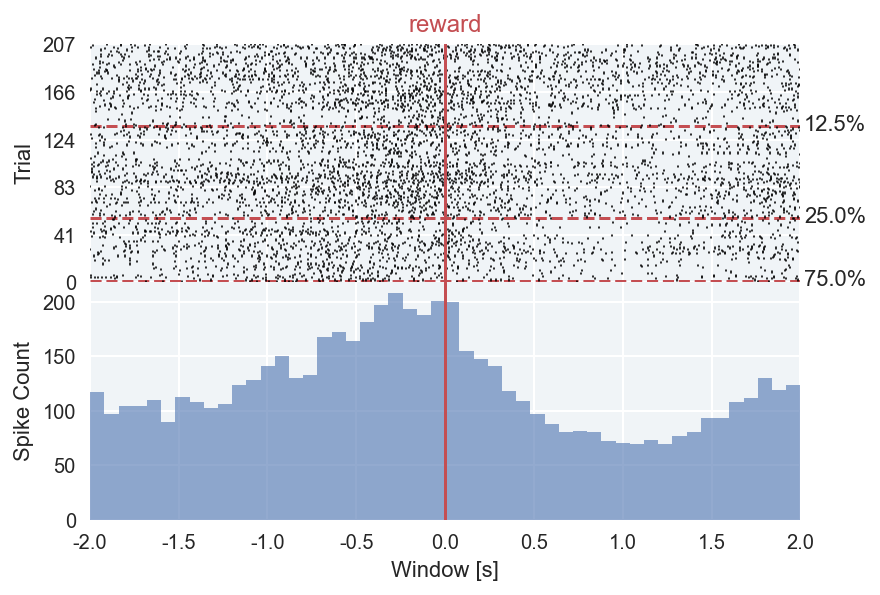

In [602]:
fig, ax, _ = JG14_190621.eda.plt_spike_train_hist(69, JG14_190621.eda.selected_trials_df, 'reward', window, bins, figsize=set_size(1.1))
save_fig("reward_aligned", fig, chapter)

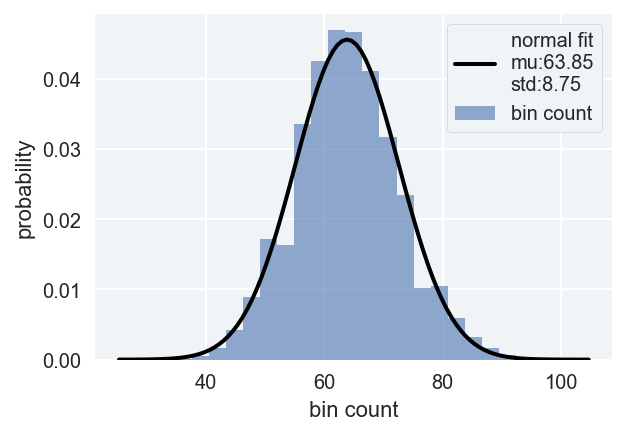

In [603]:
fig,ax = JG14_190621.sda.plt_fit_normdist(np.concatenate(JG14_190621.sda.data_dict['all']['binned'][38]).ravel(),figsize=set_size(0.8))
save_fig("boot_dist1", fig, chapter)

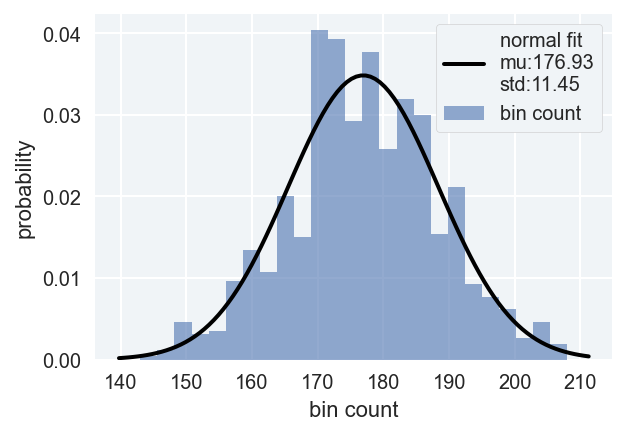

In [604]:
fig,ax = JG14_190621.sda.plt_fit_normdist(JG14_190621.sda.data_dict['all']['binned'][12][0],figsize=set_size(0.8))
save_fig("boot_dist2", fig, chapter)

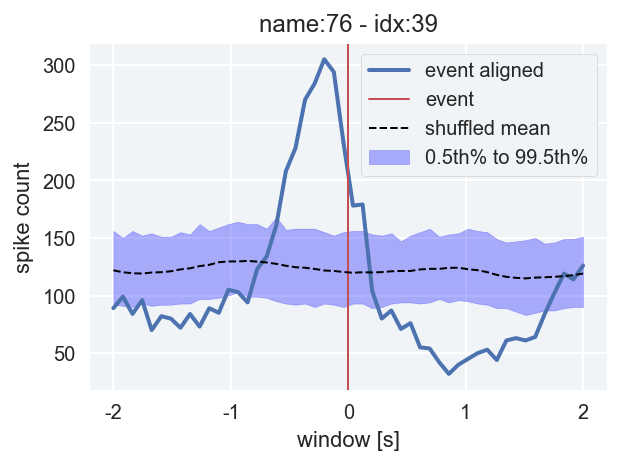

In [605]:
fig,ax = JG14_190621.sda.plt_compare_random_fixed(39,window,bins,
                                                  JG14_190621.sda.data_dict['all']['reward_alinged'],
                                                  JG14_190621.sda.data_dict['all']['mean'],
                                                  JG14_190621.sda.data_dict['all']['percentiles'],
                                                  figsize=set_size(0.8),
                                                  )
save_fig("per", fig, chapter)

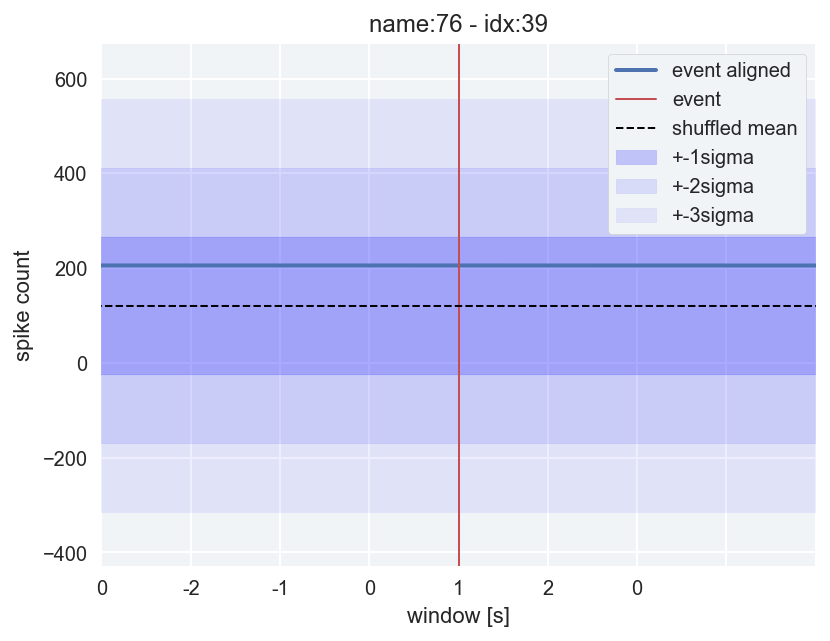

In [606]:
cluster = 39
reward_aligned_ar=JG14_190621.sda.data_dict['all']['reward_alinged']
mean_ar = np.mean(JG14_190621.sda.data_dict['all']["binned"], axis=2)
#mean_ar = JG14_190621.sda.data_dict['all']["mean"]
var_ar = np.var(JG14_190621.sda.data_dict['all']["binned"], axis=2)

fig,ax = JG14_190621.sda.plt_compare_random_fixed_sigma(
                                            cluster, 
                                            window, 
                                            bins, 
                                            JG14_190621.sda.data_dict['all']['reward_alinged'],
                                            JG14_190621.sda.data_dict['all']["mean"], 
                                            var_ar
                                              )

#save_fig("sig", fig, chapter)

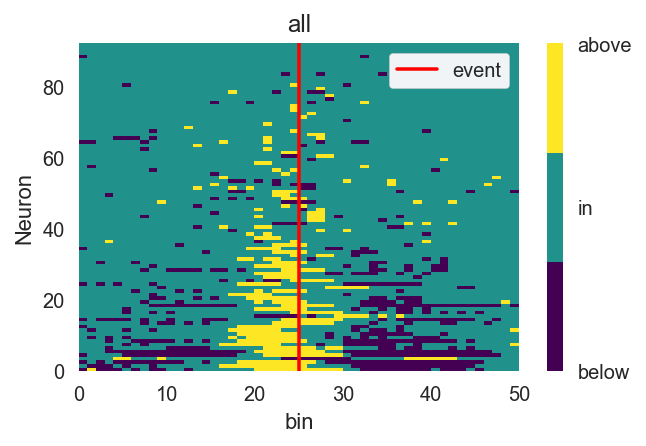

In [607]:
fig,ax, _ = JG14_190621.sda.plt_neuron_fingerprint_all(JG14_190621.sda.data_dict['all']['fingerprint_per'].sort_values(by=["above"],ascending=False).iloc[:, 0:50].values,
                                                    'all', fig=None, ax=None, figsize=set_size(0.8))
save_fig("finger_per", fig, chapter)

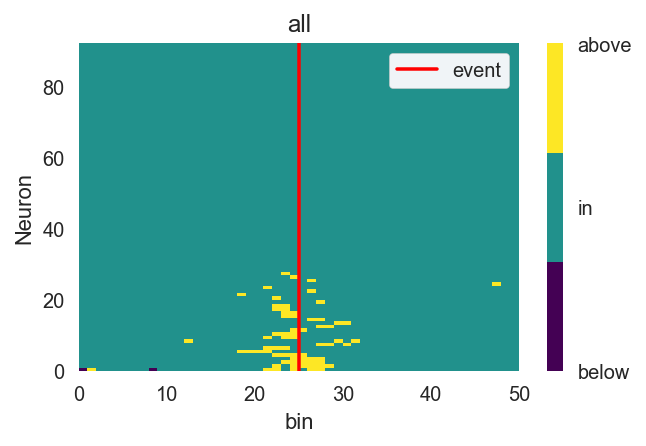

In [608]:
reward_aligned_ar=JG14_190621.sda.data_dict['all']['reward_alinged']
mean_ar = np.mean(JG14_190621.sda.data_dict['all']["binned"], axis=2)
var_ar = np.var(JG14_190621.sda.data_dict['all']["binned"], axis=2)

fingerprint_sig = JG14_190621.sda.get_fingerprint(
            reward_aligned_ar, mean_ar - 1 * var_ar, mean_ar + 1 * var_ar, bins
        )

fig,ax, _ = JG14_190621.sda.plt_neuron_fingerprint_all(fingerprint_sig.sort_values(by=["above"],ascending=False).iloc[:, 0:50].values,
                                                    'all', fig=None, ax=None, figsize=set_size(0.8))

save_fig("finger_sig", fig, chapter)

# Chapter Results Data

In [609]:
chapter = '06resultsdata'

sessions_info_df=get_trial_info(all_sessions_dict)

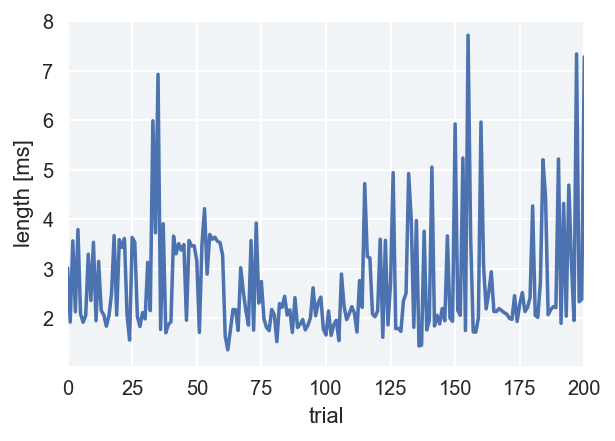

In [610]:
fig,ax = plt.subplots(1,1,figsize=set_size(0.8))
ax.plot(JG18b_190828.eda.selected_trials_df.loc[:,'length'])
ax.set_ylabel('length [ms]')
ax.set_xlabel('trial')
ax.set_xlim([0,200])

ax.set_yticklabels(np.arange(1,10))

save_fig("trial_length", fig, chapter)

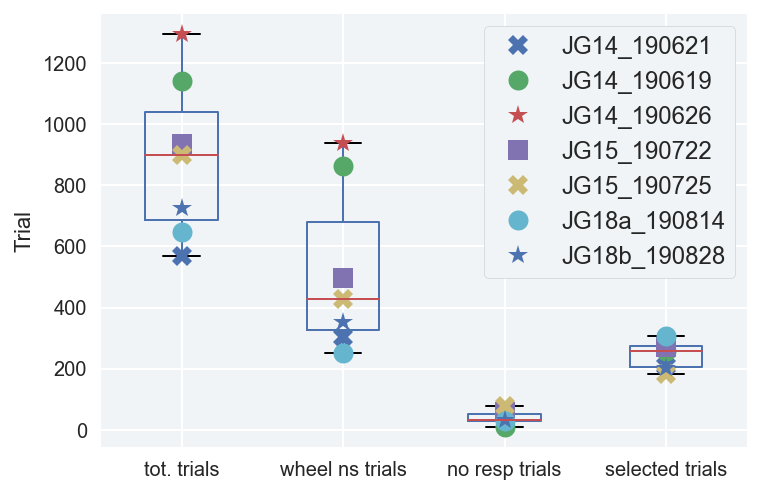

In [611]:
# wheel not stop vs other
fig,ax = boxplot(sessions_info_df,['tot. trials','wheel ns trials','no resp trials','selected trials' ],True,figsize=set_size())
#save_fig("boxplot_whell_ns", fig)



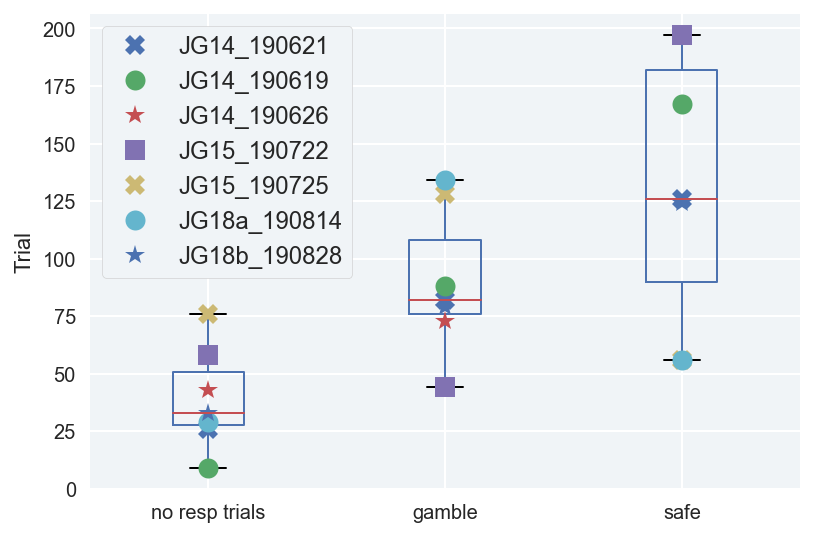

In [612]:
# gamble vs save
fig,ax = boxplot(sessions_info_df,['no resp trials','gamble','safe'],True,figsize=set_size(1.1))
save_fig("boxplot_gamble_safe", fig, chapter)



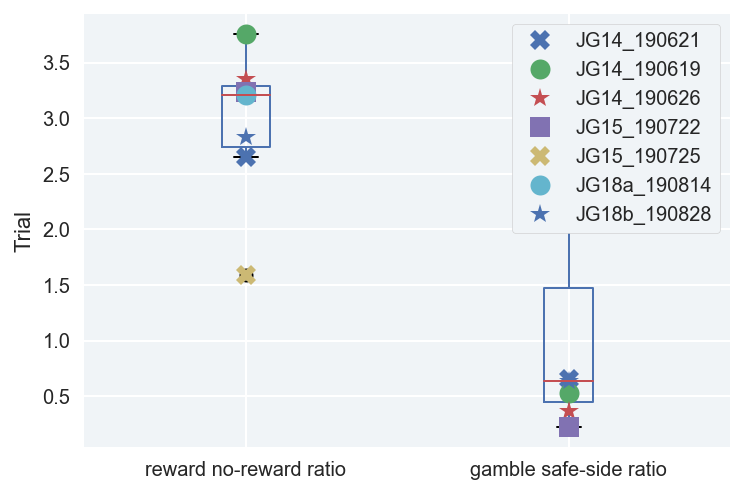

In [613]:
sessions_info_df['reward no-reward ratio'] = (sessions_info_df['reward'] / sessions_info_df['no-reward'])
sessions_info_df['gamble safe-side ratio'] = (sessions_info_df['gamble'] / sessions_info_df['safe'])

fig,ax = boxplot(sessions_info_df,['reward no-reward ratio','gamble safe-side ratio'],True,figsize=set_size())
ax.legend(loc=1)
save_fig("boxplot_ratio", fig, chapter)

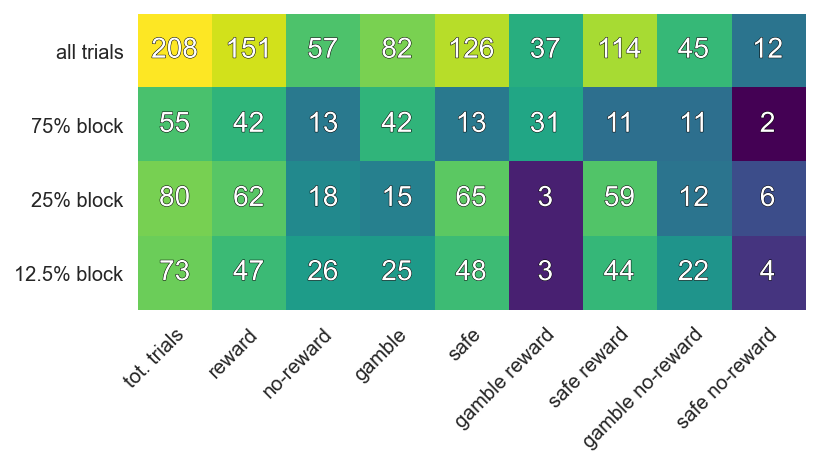

In [614]:
JG14_190621.behavior.create_session_info_df()
fig,ax=JG14_190621.behavior.colormap(JG14_190621.behavior.info_df,figsize=set_size())
save_fig("colorbar14", fig, chapter)

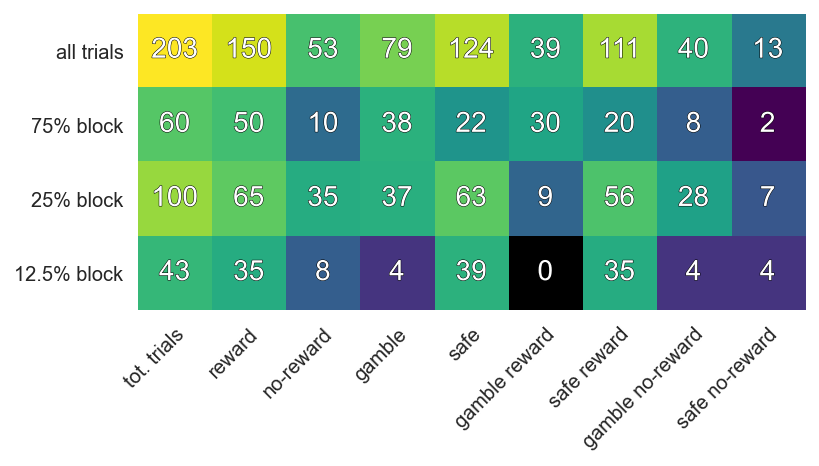

In [615]:
JG18b_190828.behavior.create_session_info_df()
fig,ax=JG18b_190828.behavior.colormap(JG18b_190828.behavior.info_df,figsize=set_size())
save_fig("colorbar18", fig, chapter)

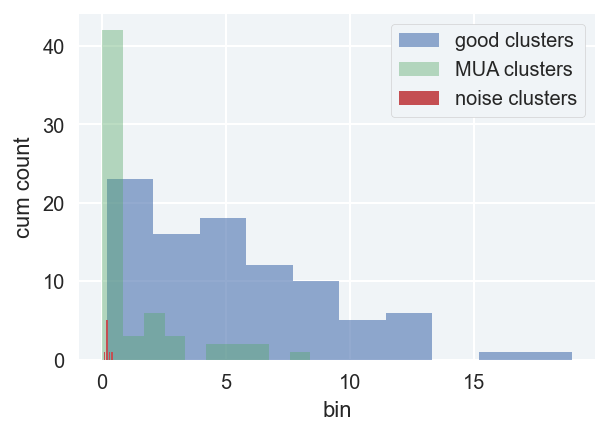

In [616]:
fig,ax = JG14_190621.eda.plt_all_cluster_spikes_hist(figsize=set_size(0.8))
save_fig('cluster_hist14',fig, chapter)

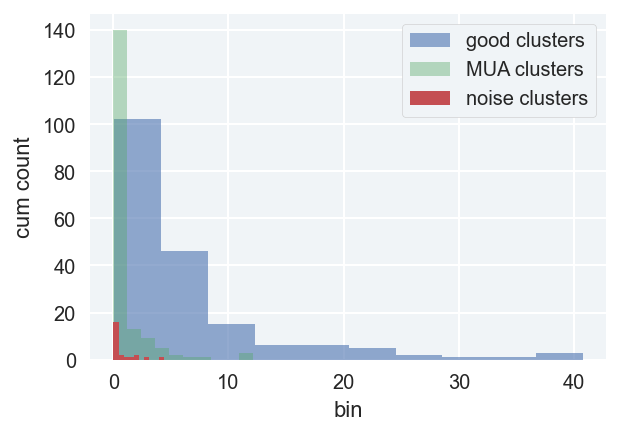

In [617]:
fig,ax = JG18b_190828.eda.plt_all_cluster_spikes_hist(figsize=set_size(0.8))
save_fig('cluster_hist18',fig, chapter)

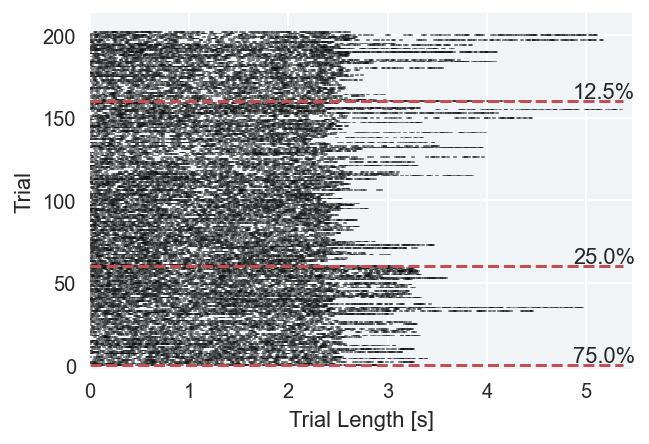

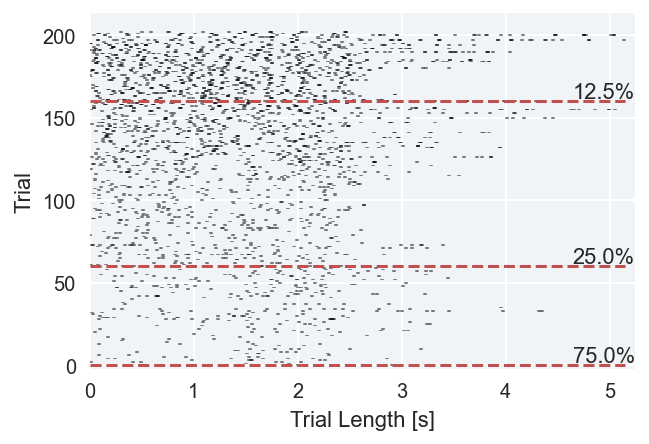

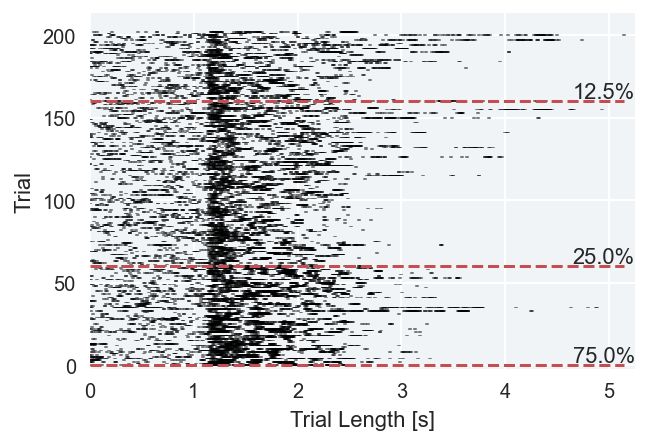

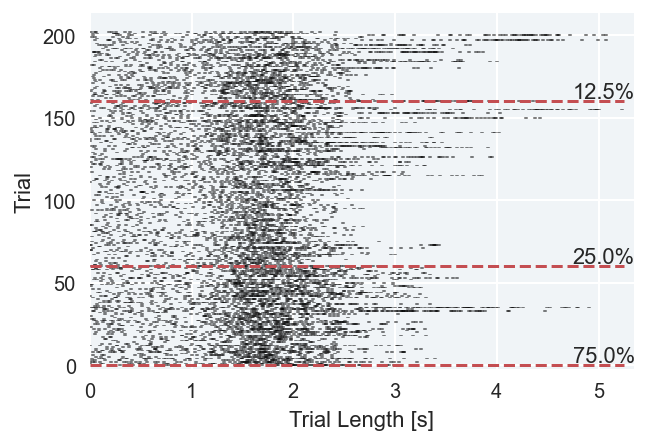

In [618]:
x=1
for neuron in [64,31]:
    fig, ax = JG18b_190828.eda.plt_spike_train(neuron,figsize=set_size(0.8))
    save_fig(f"eventplot{x}", fig, chapter)
    x+=1
    
for neuron in [106,117]:
    fig, ax = JG18b_190828.eda.plt_spike_train(neuron,figsize=set_size(0.8))
    save_fig(f"eventplot{x}", fig, chapter)
    x+=1

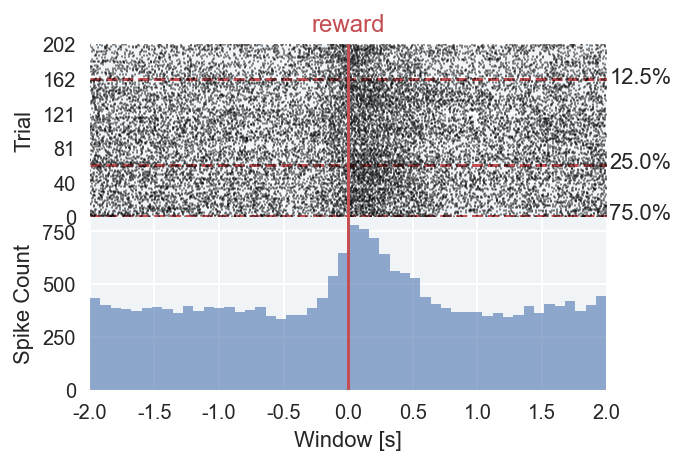

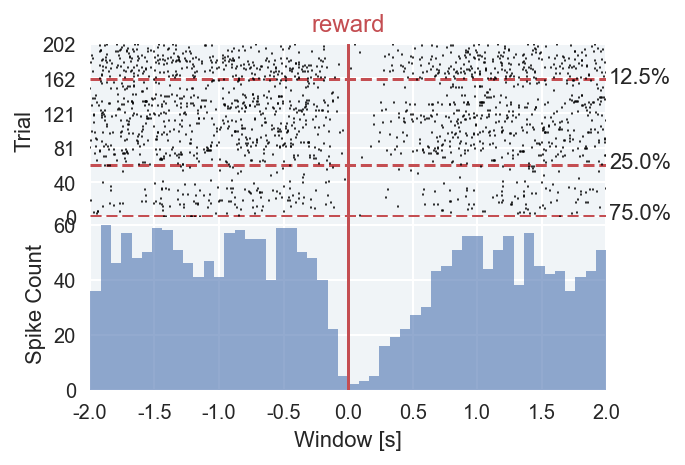

In [619]:
fig, ax, _ = JG18b_190828.eda.plt_spike_train_hist(104, JG18b_190828.eda.selected_trials_df, 'reward', window, bins, figsize=set_size(0.8),alpha=0.6)
save_fig("psth_cor", fig, chapter)

fig, ax, _ = JG18b_190828.eda.plt_spike_train_hist(2, JG18b_190828.eda.selected_trials_df, 'reward', window, bins, figsize=set_size(0.8))
save_fig("psth_notcor", fig, chapter)

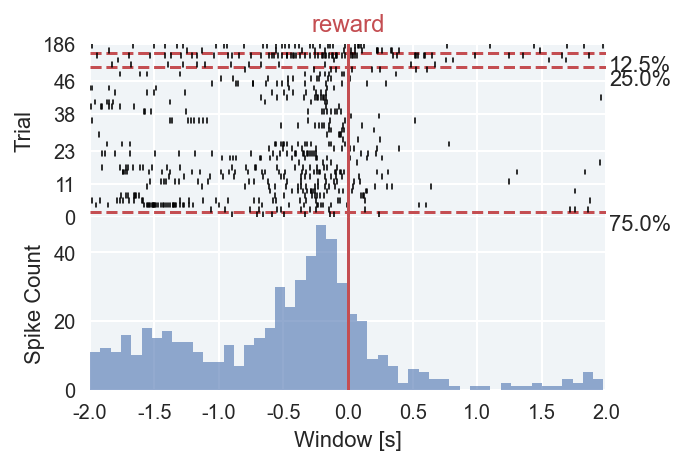

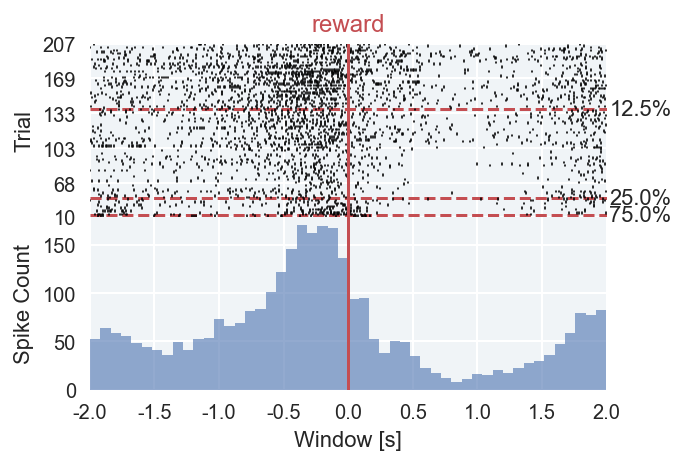

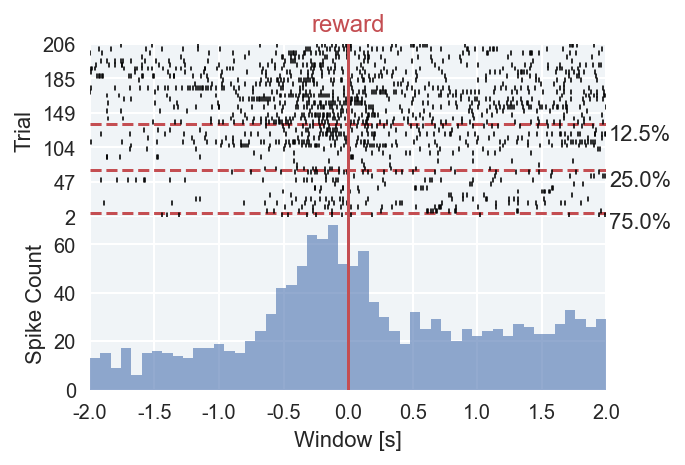

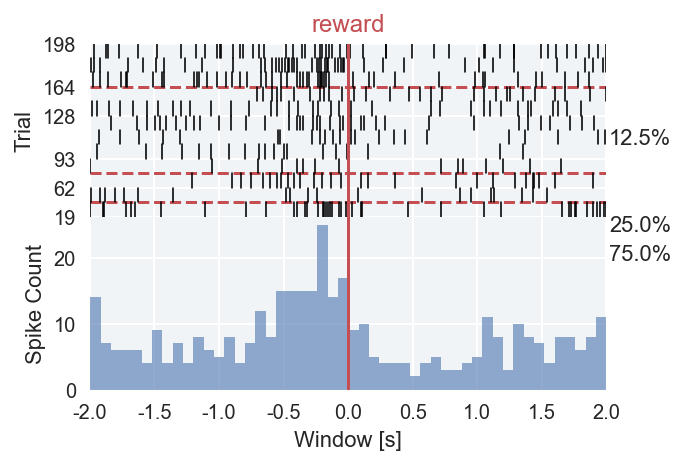

In [620]:
cluster = 76

if JG14_190621.eda.gamble_side == 'right':
    save='left'
    gamble='right'
else:
    save='right'
    gamble='left'

# gamble + rw
selected_trials = JG14_190621.eda.selected_trials_df[(JG14_190621.eda.selected_trials_df[gamble])&(JG14_190621.eda.selected_trials_df['reward_given'])]
fig,ax,_ = JG14_190621.eda.plt_spike_train_hist(cluster, selected_trials, 'reward', 2000,bins,figsize=set_size(0.8))
save_fig('gamble_rw',fig,chapter)

# safe + rw
selected_trials = JG14_190621.eda.selected_trials_df[(JG14_190621.eda.selected_trials_df[save])&(JG14_190621.eda.selected_trials_df['reward_given'])]
fig,ax,_ = JG14_190621.eda.plt_spike_train_hist(cluster, selected_trials, 'reward', 2000, bins,figsize=set_size(0.8))
save_fig('safe_rw',fig,chapter)

# gamble + norw
selected_trials = JG14_190621.eda.selected_trials_df[(JG14_190621.eda.selected_trials_df[gamble])&(np.invert(JG14_190621.eda.selected_trials_df['reward_given']))]
fig,ax,_ = JG14_190621.eda.plt_spike_train_hist(cluster, selected_trials, 'reward', 2000, bins,figsize=set_size(0.8))
save_fig('gamble_norw',fig,chapter)

# safe + norw
selected_trials = JG14_190621.eda.selected_trials_df[(JG14_190621.eda.selected_trials_df[save])&(np.invert(JG14_190621.eda.selected_trials_df['reward_given']))]
fig,ax,_ = JG14_190621.eda.plt_spike_train_hist(cluster, selected_trials, 'reward', 2000, bins,figsize=set_size(0.8))
save_fig('safe_norw',fig,chapter)

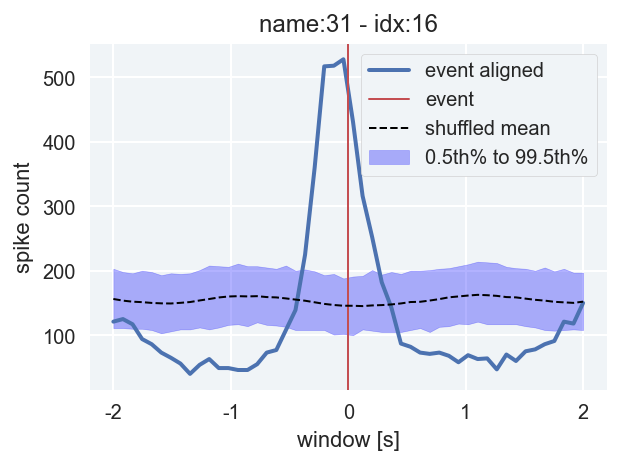

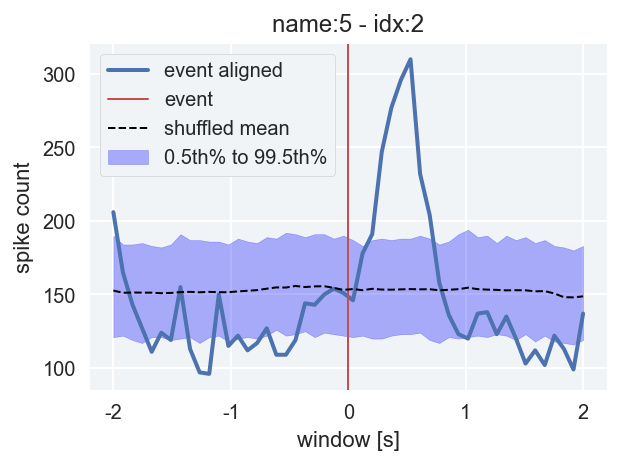

In [621]:
fig,ax = JG14_190621.sda.plt_compare_random_fixed(16,window,bins,
                                                  JG14_190621.sda.data_dict['all']['reward_alinged'],
                                                  JG14_190621.sda.data_dict['all']['mean'],
                                                  JG14_190621.sda.data_dict['all']['percentiles'],
                                                  figsize=set_size(0.8),
                                                  )
save_fig("jg14per", fig, chapter)

fig,ax = JG18b_190828.sda.plt_compare_random_fixed(2,window,bins,
                                                  JG18b_190828.sda.data_dict['all']['reward_alinged'],
                                                  JG18b_190828.sda.data_dict['all']['mean'],
                                                  JG18b_190828.sda.data_dict['all']['percentiles'],
                                                  figsize=set_size(0.8),
                                                  )
save_fig("jg18per", fig, chapter)

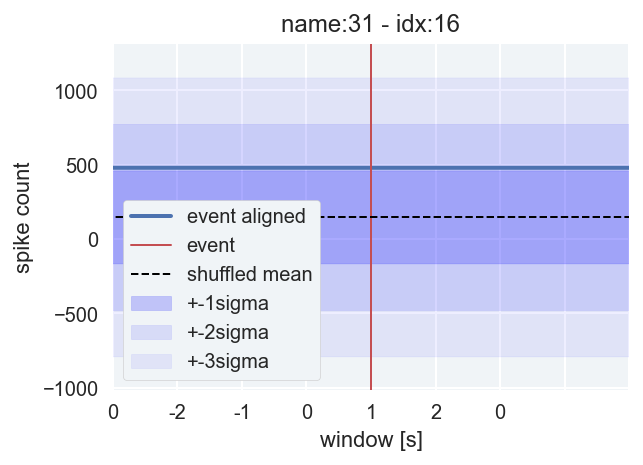

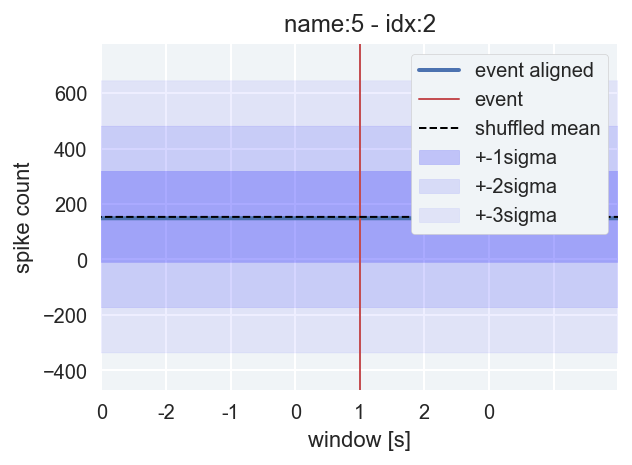

In [622]:
fig,ax = JG14_190621.sda.plt_compare_random_fixed_sigma(
                                            16, 
                                            window, 
                                            bins, 
                                            JG14_190621.sda.data_dict['all']['reward_alinged'],
                                            np.mean(JG14_190621.sda.data_dict['all']["binned"], axis=2), 
                                            np.var(JG14_190621.sda.data_dict['all']["binned"], axis=2),
                                            figsize=set_size(0.8)
                                              )

save_fig("jg14sig", fig, chapter)

fig,ax = JG18b_190828.sda.plt_compare_random_fixed_sigma(
                                            2, 
                                            window, 
                                            bins, 
                                            JG18b_190828.sda.data_dict['all']['reward_alinged'],
                                            np.mean(JG18b_190828.sda.data_dict['all']["binned"], axis=2), 
                                            np.var(JG18b_190828.sda.data_dict['all']["binned"], axis=2),
                                            figsize=set_size(0.8)
                                              )

save_fig("jg18sig", fig, chapter)


[4.         3.18305693]
[4.62990098 3.18305693]


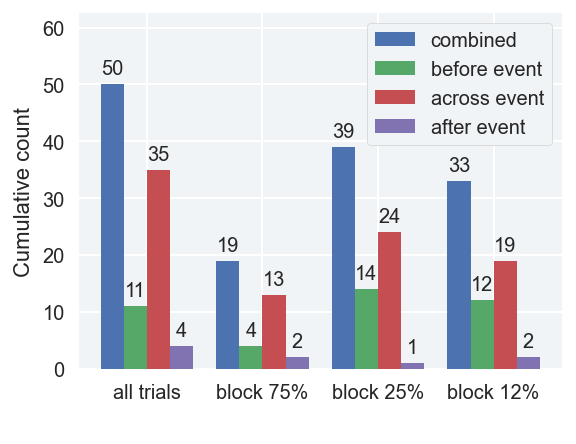

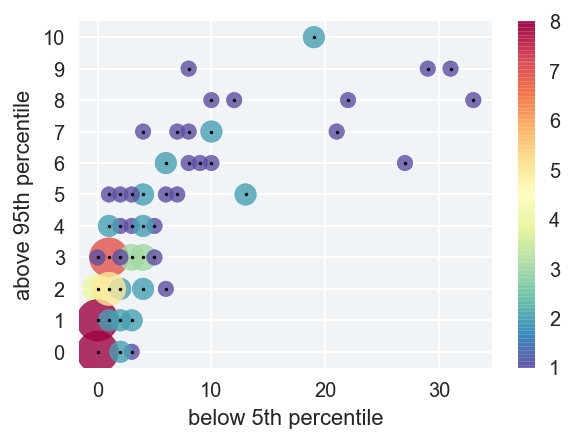

In [623]:
fig,ax = JG14_190621.sda.plt_bar_sig_neurons(
                                    JG14_190621.sda.info_df.loc[1, :], 'all', title=False, x_label=True, figsize=set_size(0.8)
                                    )
fig.set_size_inches(4,3.18305693)
save_fig("fingerprint-14-1", fig, chapter)
print(fig.get_size_inches())

fig,ax,im = JG14_190621.sda.plt_fingerprint_2d(JG14_190621.sda.data_dict['all']['fingerprint_per'],
                                               ["95th percentile","5th percentile"],
                                               figsize=set_size(0.8)
                                              )
#fig.set_size_inches(set_size(1))
save_fig("fingerprint-14-2", fig, chapter)
print(fig.get_size_inches())


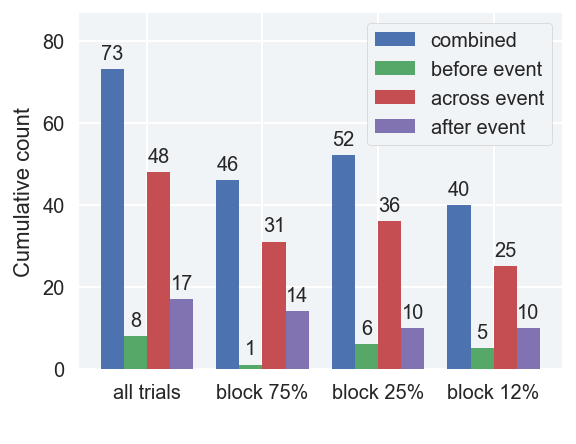

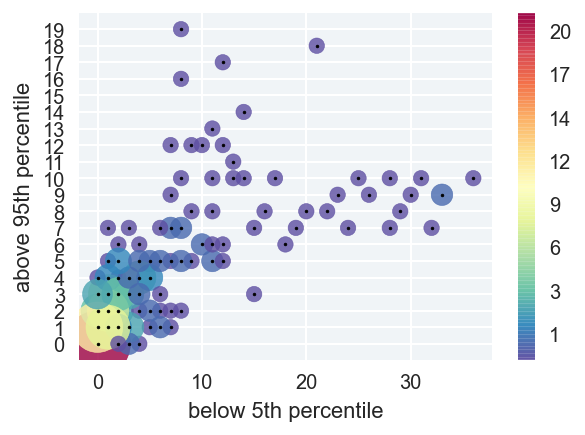

In [624]:
fig,ax = JG18b_190828.sda.plt_bar_sig_neurons(
                                    JG18b_190828.sda.info_df.loc[1, :], 'all', title=False, x_label=True, figsize=set_size(0.8)
                                    )
fig.set_size_inches(4,3.18305693)
save_fig("fingerprint-18-1", fig, chapter)

fig,ax,im = JG18b_190828.sda.plt_fingerprint_2d(JG18b_190828.sda.data_dict['all']['fingerprint_per'],
                                               ["95th percentile","5th percentile"],
                                               figsize=set_size(0.8)
                                              )
save_fig("fingerprint-18-2", fig, chapter)

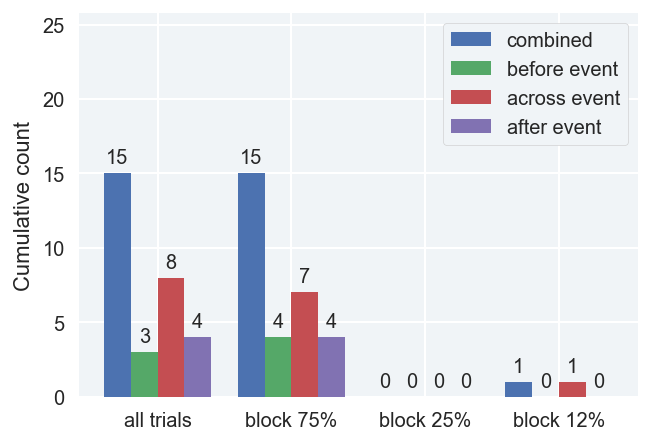

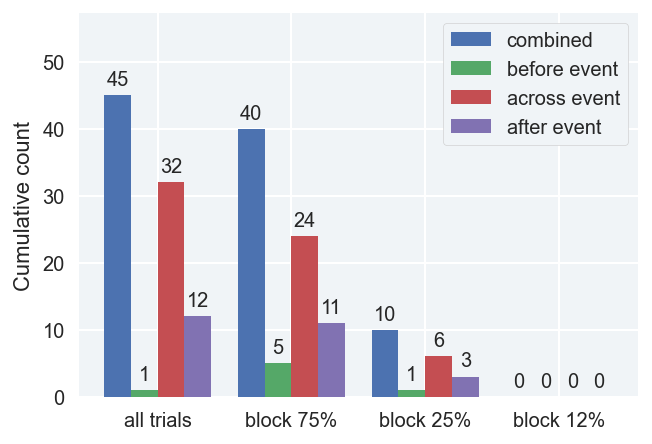

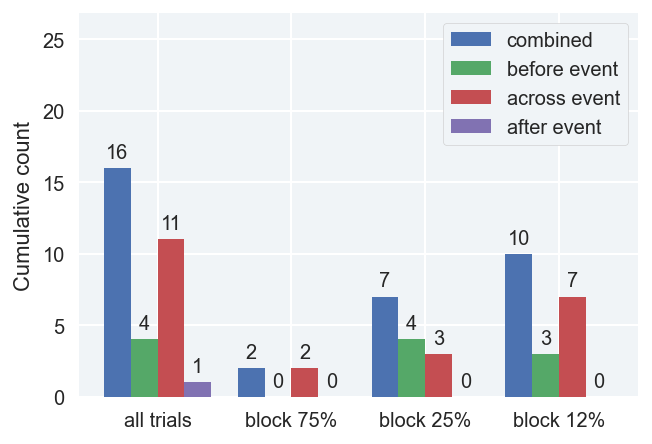

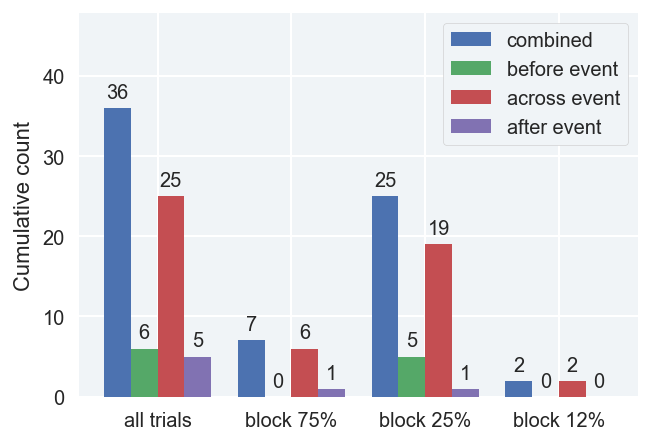

In [625]:
for trial,name in zip(["rw_gamble","norw_gamble"],
                      ['rw-gamble','norw-gamble']
                     ):

    fig,ax = JG14_190621.sda.plt_bar_sig_neurons(
                                        JG14_190621.sda.info_df.loc[1, :], trial, title=False,
                                        x_label=False,
                                        figsize=set_size(0.8),
                                        )
    save_fig(f"jg14-{name}", fig, chapter)
             
    fig,ax = JG18b_190828.sda.plt_bar_sig_neurons(
                                        JG18b_190828.sda.info_df.loc[1, :], trial, title=False,
                                        x_label=False,
                                        figsize=set_size(0.8),
                                        )
    save_fig(f"jg18-{name}", fig, chapter)

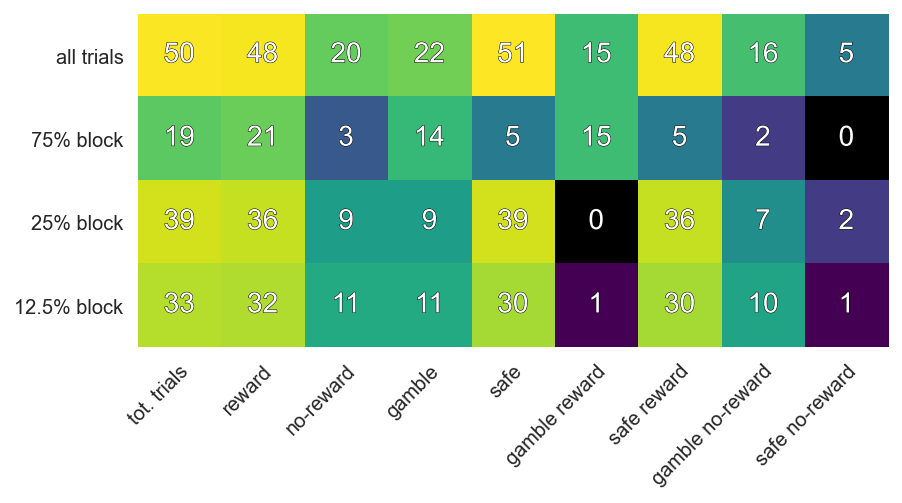

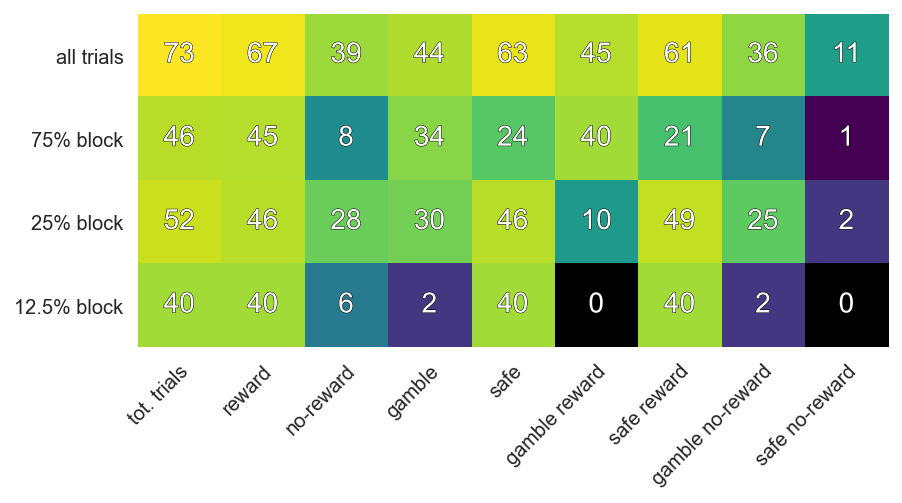

In [626]:
fig,ax = JG14_190621.sda.colormap(JG14_190621.sda.info_df,figsize=set_size(1.1))
save_fig('finger_colormap14', fig, chapter)

fig,ax = JG18b_190828.sda.colormap(JG18b_190828.sda.info_df,figsize=set_size(1.1))
save_fig('finger_colormap18', fig, chapter)

# Chapter Discussion

In [627]:
chapter = '07discussion'

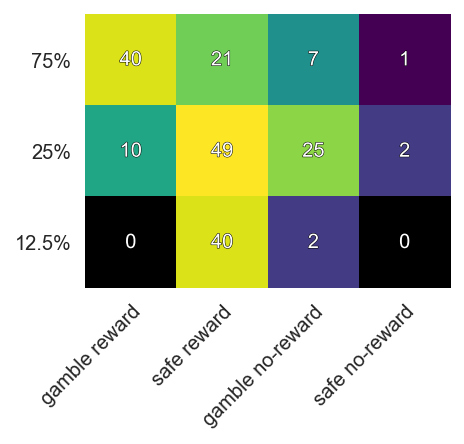

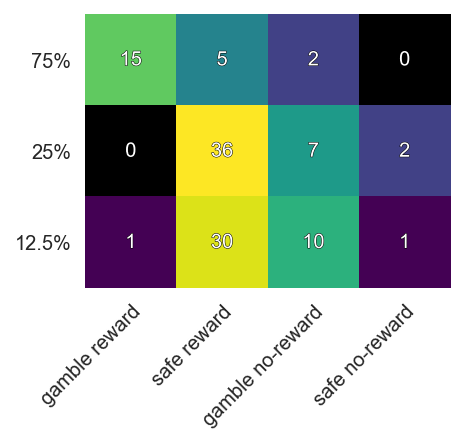

In [628]:
info_df = np.zeros([3,4],dtype=int)
for block in [1,2,3]:
    info_df[block-1,:] = JG18b_190828.sda.info_df[[f'{block} rw_gamble all',f'{block} rw_safe all', f'{block} norw_gamble all',f'{block} norw_safe all']].values.astype(int)
    
fig, ax = JG18b_190828.sda.plt_colormap(info_df,figsize=set_size(0.8))    
save_fig('sig-colorbar-jg18',fig,chapter)

info_df = np.zeros([3,4],dtype=int)
for block in [1,2,3]:
    info_df[block-1,:] = JG14_190621.sda.info_df[[f'{block} rw_gamble all',f'{block} rw_safe all', f'{block} norw_gamble all',f'{block} norw_safe all']].values.astype(int)
    
fig, ax = JG14_190621.sda.plt_colormap(info_df,figsize=set_size(0.8))    
save_fig('sig-colorbar-jg14',fig,chapter)

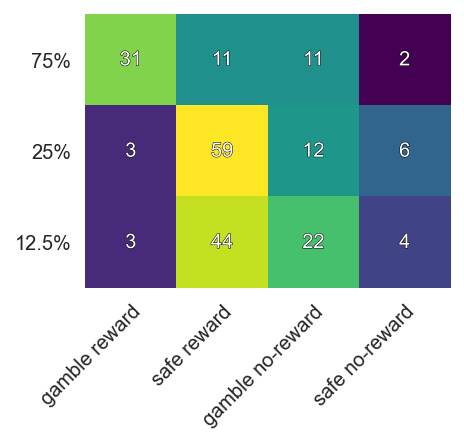

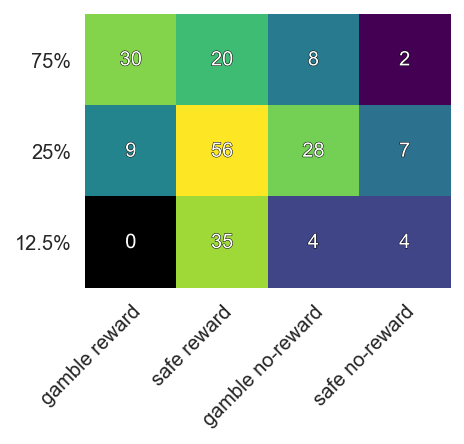

In [629]:
info_df = np.zeros([3,4],dtype=int)
i=0
for block in [0.750,0.250,0.125]:
    info_df[i,:] = JG14_190621.behavior.info_df.loc[JG14_190621.behavior.info_df['block']==block,
                                                    ['gamble reward','safe reward','gamble no-reward','safe no-reward']
                                                    ]
    i+=1  
fig, ax = JG14_190621.sda.plt_colormap(info_df,figsize=set_size(0.8))    
save_fig('trials-colorbar-jg14',fig,chapter)

info_df = np.zeros([3,4],dtype=int)
i=0
for block in [0.750,0.250,0.125]:
    info_df[i,:] = JG18b_190828.behavior.info_df.loc[JG18b_190828.behavior.info_df['block']==block,
                                                    ['gamble reward','safe reward','gamble no-reward','safe no-reward']
                                                    ]
    i+=1
fig, ax = JG18b_190828.sda.plt_colormap(info_df,figsize=set_size(0.8))    
save_fig('trials-colorbar-jg18',fig,chapter)

# Workbench